In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf  
from sklearn import preprocessing
import collections
from scipy import stats 

In [3]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')


db_hepatopata = pd.read_excel('Hepatopata.xls')


db_oncologicos = pd.read_excel('Oncologicos.xls')


db_PTI = pd.read_excel('PTI.xls')



In [4]:
db_displasia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(9), object(8)
memory usage: 358.5+ KB


In [5]:
db_hepatopata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 88 columns):
LEU      342 non-null float64
NEU      342 non-null float64
NEUp     342 non-null float64
LIN      342 non-null float64
LINp     342 non-null float64
MON      342 non-null float64
MONp     342 non-null float64
EOS      342 non-null float64
EOSp     342 non-null float64
BAS      342 non-null float64
BASp     342 non-null float64
IG       342 non-null float64
IGp      342 non-null float64
ERIT     342 non-null float64
HGB      342 non-null float64
HCT      342 non-null float64
VCM      342 non-null float64
HCM      342 non-null float64
CHCM     342 non-null float64
RDW      342 non-null object
ERBL     342 non-null float64
ERBLp    342 non-null float64
RET      49 non-null float64
RETp     49 non-null float64
FRI      49 non-null float64
RETHE    49 non-null float64
PLT      341 non-null float64
VPM      342 non-null object
IPF      234 non-null float64
HIPER    49 non-null float64
HY

In [6]:
#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [7]:
#Añadimos una nueva variable que identifique la patologia

db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)


In [8]:
db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [9]:
#Añadimos una variable que identifique el diagnostico
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

In [10]:
db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [11]:
#Añadimos una variable que identifique el diagnostico
db_onc['Diagnosis']=np.full((303,1),2)

In [12]:
#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [13]:
#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 50 columns):
LEU          1263 non-null float64
NEU          1262 non-null float64
LIN          1262 non-null float64
MON          1262 non-null float64
EOS          1262 non-null float64
BAS          1262 non-null float64
IG           1262 non-null float64
ERIT         1263 non-null float64
HGB          1263 non-null float64
HCT          1263 non-null float64
VCM          1263 non-null float64
HCM          1263 non-null float64
CHCM         1263 non-null float64
ERBL         1263 non-null float64
PLT          1257 non-null float64
MacR         1263 non-null float64
MicR         1263 non-null float64
NE_R         1262 non-null float64
LY_R         1262 non-null float64
MO_R         1262 non-null float64
EO_R         1262 non-null float64
BA_R         1262 non-null float64
BA-D#        1262 non-null float64
BA-N#        1262 non-null float64
HFLCA        1262 non-null float64
HFLCP        1262 n

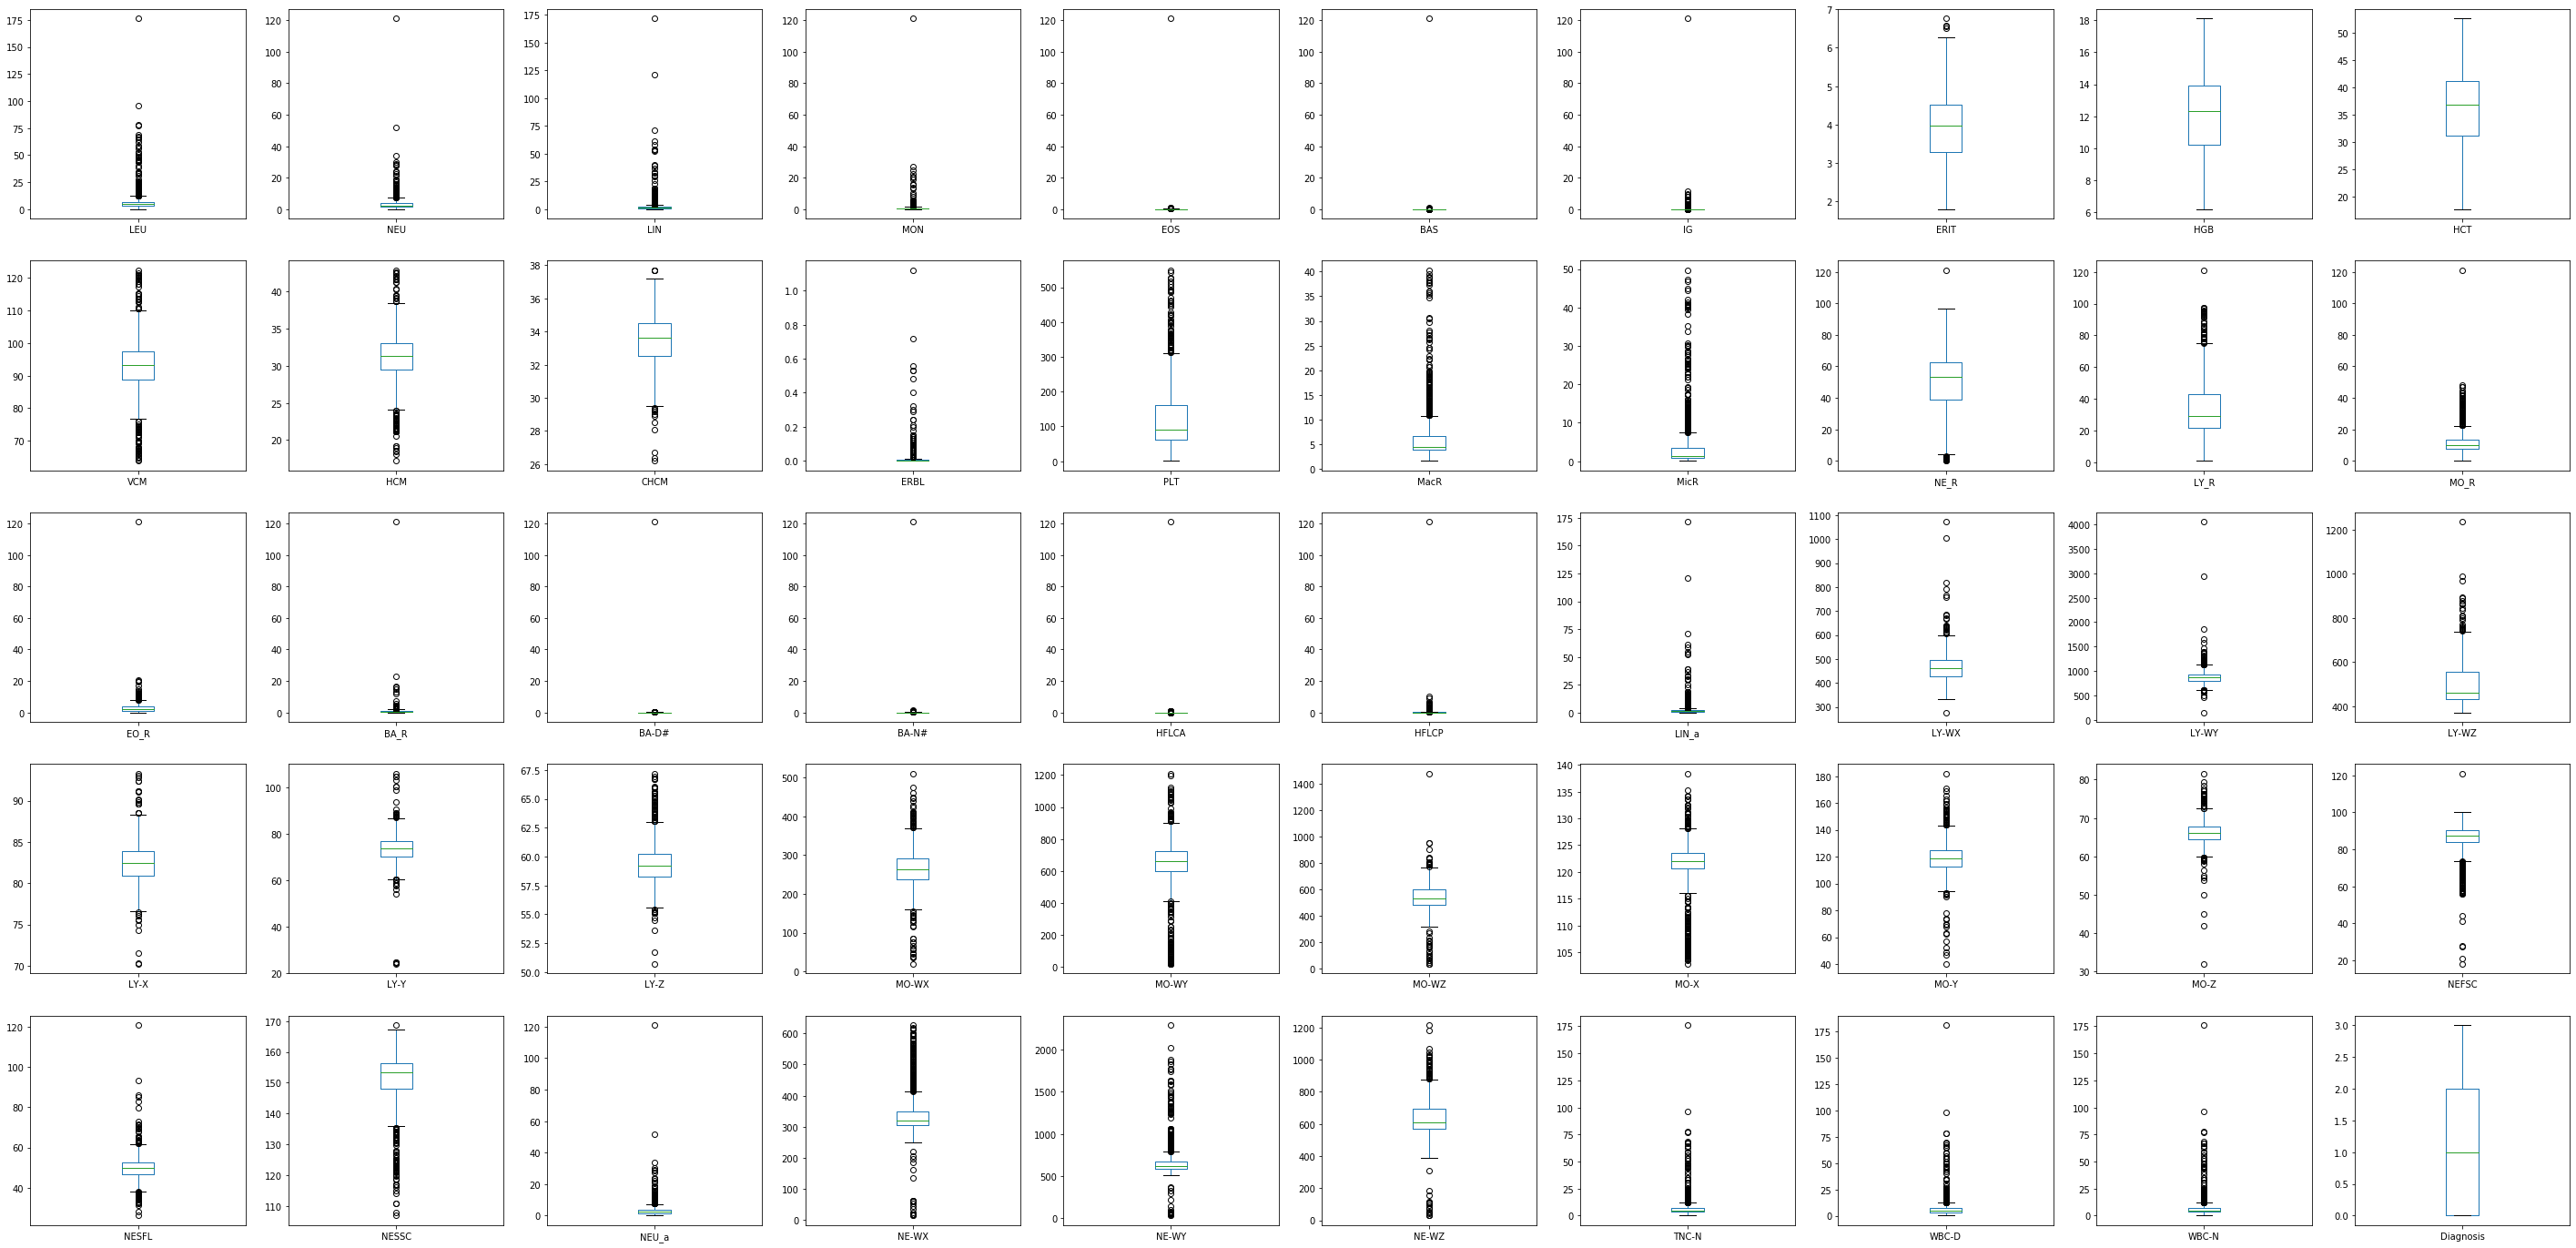

In [15]:
db_smd_hpt = pd.concat([db_smd,db_hpt,db_onc,db_pti])

db_smd_hpt.info()

db_smd_hpt = db_smd_hpt.replace(np.nan ,np.mean(db_smd_hpt['PLT']))




db_smd_hpt.plot(kind='box',subplots=True, layout= (10,10), sharex= False, sharey = False, figsize = (50,50))
plt.show()



In [16]:
#Obtenemos z-score

z = np.abs(stats.zscore(db_smd_hpt))


#Establecemps un umbral 

threshold = 2
pos = np.where(z >threshold)

#Eliminamos los outliers identificados por z-score 

#db_smd_hpt = db_smd_hpt[(z < threshold).all(axis=1)]

### Realización de particiones

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [18]:
#Realizamos las particiones de entrenamiento y test

x = db_smd_hpt.drop(['Diagnosis'],axis=1)
y = db_smd_hpt['Diagnosis']

# Realizamos One-hot-encoding de las etiquetas
y_vals = np.eye(len(set(y)))[y]

x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2, random_state=7)


scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# obtenemos las etiquetas del test como valores 0,1,2 y 3, ya que estaban codificadas.

y_test_cls = np.array([label.argmax() for label in y_test])



### Creación del modelo KNN

In [20]:
x_data_train = tf.placeholder(shape=[None, 49], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, 49], dtype=tf.float32)


### Validación cruzada

Realizamos validación cruzada para tener una buena capacidad de generalización.

cv_k_Scores: [0.8260869565217391, 0.8142292490118577, 0.83399209486166, 0.8260869565217391, 0.8142292490118577, 0.8063241106719368, 0.8221343873517787, 0.8102766798418972, 0.8023715415019763, 0.8063241106719368]
10
10


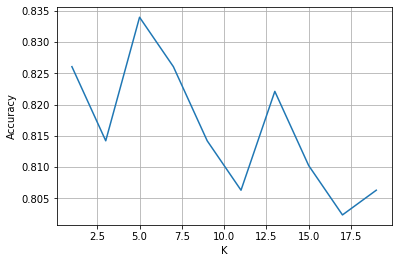

El valor óptimo de vecinos cercanos es: 5
El máximo valor de accuracy es: 0.83399209486166


In [21]:
k_values = range(1,21,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))



Se implementa la distancia Manhattan:valor absoluto de la diferencia entre los valores del vector de dos puntos de datos de x1 y x2.
El comando 'tf.expand_dims' añade una dimension extra a 'x_data_test' para que se puede llevar a cabo la resta.




In [22]:

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)


Reemplazamos el valor de k que hemos obtenido tras realizar validación cruzada.


In [23]:
k = 5

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

- Con la funcion 'tf.nn.top_k()', se obtienes los mayores valores y los índices de KNN. El primer valor de retorno, son los valores de las distancias y por lo tanto se descartan ya que la función 'tf.negative()' hace que los valores sean negativos.


- Con la función 'tf.gather()' extraemos las etiquetas de entrenamiento asociadas a los índices de los vecinos más cercanos. Por tanto, top_k_label son las etiquetas codificadas.


- Con la función 'tf.reduce_sum()', se obtiene la suma de elementos.


- Con la funcion 'tf.argmax()' se obtienen las etiquetas predichas ya que con esta función se obtiene el índice del valor máximo.

## Entrenamiento

In [24]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})

In [25]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))
        
    

[[79  2  1  1]
 [ 2 65  4  1]
 [ 8 17 35  3]
 [ 0  0  3 32]]


In [26]:
# Contamos cuantos pacientes hay en cada clase
collections.Counter(y_test_cls)

Counter({1: 72, 0: 83, 2: 63, 3: 35})

## Evaluación

In [27]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))


0.83399209486166


# Validación cruzada - distancia euclidea

En este punto, se realiza validación cruzada tomando como medida de distancia la euclídea, ya que sabemos que KNN es sensible a la distancia que se considere (los vecinos cercanos pueden cambiar).

cv_k_Scores: [0.7905138339920948, 0.782608695652174, 0.8142292490118577, 0.8300395256916996, 0.8063241106719368, 0.8102766798418972, 0.8102766798418972, 0.8102766798418972, 0.7944664031620553, 0.8063241106719368]
10
10


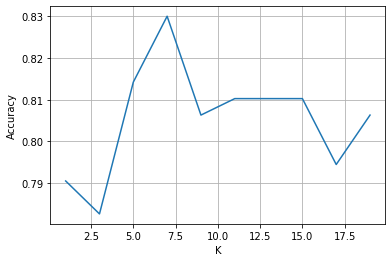

El valor óptimo de vecinos cercanos es: 7
El máximo valor de accuracy es: 0.8300395256916996


In [28]:
k_values = range(1,21,2)
cv_k_scores = []

# Definimos la distancia euclidea
euclidian_distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2))


for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))



Hemos obtenido como valor óptimo de vecinos cercanos el valor 7, por tanto creamos el modelo con este valor de k.

In [29]:
k = 7

# K puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

# Obtenmos las predicciones
sess = tf.Session()
prediction_outcome_d2 = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})

# Obtenemos la tasa de acierto
accuracy_d2 = 0
for pred, actual in zip(prediction_outcome_d2, y_test):
    if pred == np.argmax(actual):
        accuracy_d2 += 1
print('Tasa de acierto:',accuracy_d2 / len(prediction_outcome_d2))


Tasa de acierto: 0.8300395256916996


In [30]:
# Matriz de confusión 

con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome_d2 )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))
        

[[77  2  2  2]
 [ 2 65  3  2]
 [ 7 16 39  1]
 [ 1  3  2 29]]


### RED NEURONAL

In [31]:
import tensorflow as tf  
from tensorflow import keras
print(tf.keras.__version__)
from keras.models import Sequential
from keras.layers.core import Dense

2.2.4-tf


Using TensorFlow backend.


In [32]:
# Crearemos una serie de capas de neuronas secuenciales
model = Sequential()

# Capa de entrada con 49 neuronas
# La primera capa oculta tiene 16 neuronas
model.add(Dense(16, input_dim=49, activation='relu'))
model.add(Dense(8, activation='relu'))


# Agregamos una capa con 4 neuronas de salida y función de activación sigmoide
model.add(Dense(4, activation='sigmoid'))

In [33]:
# Función de pérdida: error cuadrático medio, optimizador= adam, definimos exactitud como métrica
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
x_train.shape

(1010, 49)

In [35]:
model.fit(x_train, y_train, epochs=100, batch_size=20, validation_split=0.1)


Train on 909 samples, validate on 101 samples
Epoch 1/100
909/909 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.2783 - val_loss: 0.2531 - val_accuracy: 0.2673
Epoch 2/100
909/909 [==============================] - 0s 198us/step - loss: 0.2243 - accuracy: 0.3520 - val_loss: 0.2126 - val_accuracy: 0.3465
Epoch 3/100
909/909 [==============================] - 0s 225us/step - loss: 0.1933 - accuracy: 0.4653 - val_loss: 0.1887 - val_accuracy: 0.4554
Epoch 4/100
909/909 [==============================] - 0s 352us/step - loss: 0.1727 - accuracy: 0.5303 - val_loss: 0.1726 - val_accuracy: 0.4950
Epoch 5/100
909/909 [==============================] - 0s 221us/step - loss: 0.1555 - accuracy: 0.5611 - val_loss: 0.1601 - val_accuracy: 0.5248
Epoch 6/100
909/909 [==============================] - 0s 192us/step - loss: 0.1427 - accuracy: 0.5842 - val_loss: 0.1509 - val_accuracy: 0.5545
Epoch 7/100
909/909 [==============================] - 0s 205us/step - loss: 0.1335 -

909/909 [==============================] - 0s 202us/step - loss: 0.0470 - accuracy: 0.8922 - val_loss: 0.0905 - val_accuracy: 0.7822
Epoch 56/100
909/909 [==============================] - 0s 198us/step - loss: 0.0464 - accuracy: 0.8933 - val_loss: 0.0901 - val_accuracy: 0.7822
Epoch 57/100
909/909 [==============================] - 0s 241us/step - loss: 0.0461 - accuracy: 0.8933 - val_loss: 0.0907 - val_accuracy: 0.7723
Epoch 58/100
909/909 [==============================] - 0s 200us/step - loss: 0.0456 - accuracy: 0.8911 - val_loss: 0.0907 - val_accuracy: 0.7723
Epoch 59/100
909/909 [==============================] - 0s 161us/step - loss: 0.0450 - accuracy: 0.8944 - val_loss: 0.0905 - val_accuracy: 0.7822
Epoch 60/100
909/909 [==============================] - 0s 276us/step - loss: 0.0452 - accuracy: 0.8988 - val_loss: 0.0905 - val_accuracy: 0.7822
Epoch 61/100
909/909 [==============================] - 0s 247us/step - loss: 0.0445 - accuracy: 0.8977 - val_loss: 0.0907 - val_accuracy

In [36]:
# Evaluamos en el conjunto de entrenamiento
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1010/1010 [==============================] - 0s 77us/step

accuracy: 91.19%


In [37]:
# Evaluamos el modelo en el conjunto de test
print('\n# Evaluación en el conjunto de test')
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Obtenemos las predicciones
predictions_mlp_codif = model.predict(x_test).round()

# Obtenemos las predicciones con valores 0,1,2 y 3 ya que estaban codificadas
predictions_mlp = np.array([label.argmax() for label in predictions_mlp_codif])

#print(predictions_mlp)


# Evaluación en el conjunto de test
253/253 [==============================] - 0s 88us/step

accuracy: 81.03%


In [38]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=predictions_mlp )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))
        

[[77  1  5  0]
 [14 50  6  2]
 [11 11 39  2]
 [ 3  2  1 29]]


In [39]:
# Contamos cuantos pacientes hay en cada clase
collections.Counter(y_test_cls)

Counter({1: 72, 0: 83, 2: 63, 3: 35})